<a href="https://colab.research.google.com/github/EduardoMoraesRitter/introducao-a-sistemas-de-recomendacao-com-python/blob/master/introducao_a_sistemas_de_recomendacao_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,genero
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [11]:
notas = pd.read_csv('ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [12]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#1º tipo de recomendação - medida de popularidade por item
quando nao tenho informação sobre o usuario novo eu recomendo os itens mais populares.
risco popular em quantidade de visulizacao mas nao nota.

o que é popular?


In [13]:
notas['filmeId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: filmeId, Length: 9724, dtype: int64

In [14]:
filmes.loc[318]

titulo    Shawshank Redemption, The (1994)
genero                         Crime|Drama
Name: 318, dtype: object

In [15]:
#juntas as tabelas pelo indice
total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [16]:
#criar uma nova coluna
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,genero,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [17]:
#ordena do maior para meno
filmes.sort_values('total_de_votos', ascending=False).head(5)

,titulo,genero,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [18]:
#agora tirar a media
notas_medias = notas.groupby('filmeId').mean()['nota']
notas_medias.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [19]:
filmes['notas_medias'] = notas_medias
filmes.sort_values('total_de_votos', ascending=False).head(10)

,titulo,genero,total_de_votos,notas_medias
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


#2º tipo de recomendação - media da nota por item
quando nao tenho informação sobre o usuario novo, posso recomendar filmes com notas medias mais altas.

cuidado com item com pouco votos e que tem nota alta.

qual numero minimo de votos necessarios?

In [20]:
filmes.sort_values('notas_medias', ascending=False).head(10)

,titulo,genero,total_de_votos,notas_medias
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [21]:
#posso filtrar e ter um minimo de quantidade de voto
filmes.query('total_de_votos >= 10').sort_values('notas_medias', ascending=False).head(10)

,titulo,genero,total_de_votos,notas_medias
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [23]:
#descobrir a media de quantidade de notas que cada filme teve
#baseado na curva normal, remover os outlier
filmes.describe()

,total_de_votos,notas_medias
count,9724.000000,9724.000000
mean,10.369807,3.262448
std,22.401005,0.869874
min,1.000000,0.500000
25%,1.000000,2.800000
50%,3.000000,3.416667
75%,9.000000,3.911765
max,329.000000,5.000000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


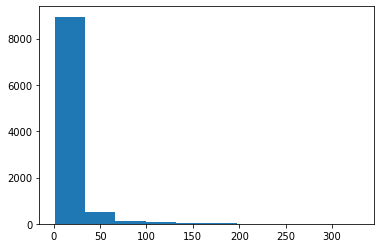

In [30]:
plt.hist(filmes['total_de_votos'])
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


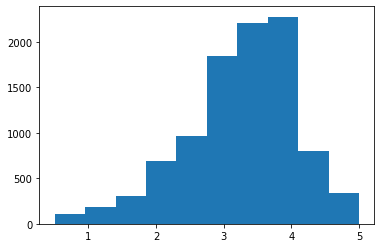

In [31]:
plt.hist(filmes['notas_medias'])
plt.show()

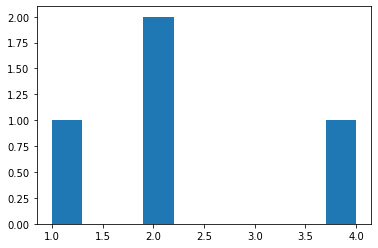

In [36]:
dados = [1,2,2,4]
plt.hist(dados)
plt.show()

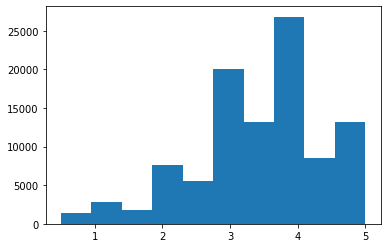

   usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247
2          1        6   4.0  964982224
3          1       47   5.0  964983815
4          1       50   5.0  964982931


In [45]:
plt.hist(notas['nota'])
plt.show()
print(notas.head())

In [22]:
filmes_mais_50 = filmes.query('total_de_votos >= 50')
filmes_mais_50.sort_values('notas_medias', ascending=False).head(10)

,titulo,genero,total_de_votos,notas_medias
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000
